In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from kmodes.kprototypes import KPrototypes
from scipy.optimize import curve_fit
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



# Consumption data (processed)

    1. The DataSet contains 21 columns and 2.444.832 rows (interactions or consumption units).
    2. The dataset has been processed and cleaned (NOT clusterised).
    3. The 21 columns or dimensions are:
        - min_data:  reproduction time
        - durada_consum: consumption duration
        - durada: videoclip duration
        - usuari_id: user (logged) id
        - player_id: reproduction id
        - producte_id: consumption platform (PortalCCMA, appTV3...)
        - contingut_id: content id
        - canal_nom: channel
        - programa_nom: program
        - programa_capitol: chapter (1,2,3...)
        - tematica: theme (poor informed)
        - dispositiu_accepta_cookies: whether the device accept cookies or not
        - dispositiu_model: device model
        - dispositiu_vendor: device vendor 
        - dispositiu_browser_nom: browser
        - dispositiu_tipus: device (mobile, pc...)
        - year: year of consumption
        - day: day of the week (monday...)
        - month: month of the year (2019...)
        - weekend: wheter if is weekdays or weekend
        - season: season of the year
        



# INDEX

### 1- Statistics patterns of consumption data
    1.1- Initial time of consumption
        1.1.1- Weekend
        1.1.2- Season 
    1.2- Consumption duration
        1.2.1- Mean values and std
        1.2.2- Weekend
        1.2.3- Season 
    1.3- Videoclip duration
        1.3.1- Mean values and std
        1.3.2- Weekend
        1.3.3- Season 
    1.4- Logged users
    1.5- Discrete/categorical dimensions: device, program, day...

In [3]:
df = pd.read_csv('consumption_data_logged_processed.csv')   # Read the clusterised data
df = df.fillna('nan') # NaN values to strings
df['year']=df['year'].astype(str) # to string
df['player_id']=df['player_id'].astype(str) # to string 
df['contingut_id']=df['contingut_id'].astype(str) # to string 
df.info()

C:\Users\josep\anaconda3\envs\ox\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444833 entries, 0 to 2444832
Data columns (total 21 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   min_data                    float64
 1   durada_consum               float64
 2   durada                      float64
 3   usuari_id                   object 
 4   player_id                   object 
 5   producte_id                 object 
 6   contingut_id                object 
 7   canal_nom                   object 
 8   programa_nom                object 
 9   programa_capitol            object 
 10  tematica                    object 
 11  dispositiu_accepta_cookies  object 
 12  dispositiu_model            object 
 13  dispositiu_vendor           object 
 14  dispositiu_browser_nom      object 
 15  dispositiu_tipus            object 
 16  year                        object 
 17  day                         object 
 18  month                       object 
 19  weekend              

# 1- Statistics patterns of consumption data

## 1.1- Initial time of consumption

Normalised (density=1) pdf of the initial time of consumption

    - Bins of 5 minutes (300s). 
    - Temporal shift of 4 hours to put the origin of consumption where it is minimun (4a.m.)
    

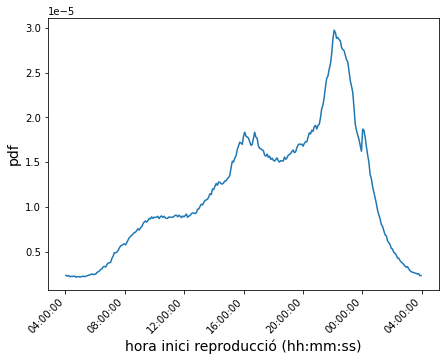

In [11]:
fig, ax1 = plt.subplots(figsize=(7,5)) 

bins=int((max(df['min_data'])-min(df['min_data']))/300.)  # Number of bins (boxes). Every 300s (5min).
hora_inici=df['min_data'].tolist()  
numpy_matrix = np.array(hora_inici)  # List of hora_inici to array
counts_agregat,bin_edges = np.histogram(numpy_matrix,bins,density=True)   # Obtain frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   # Center of each bin


# we need to do this step to undo the 4 hour time shift for visualisation (adding 4h, i.e. 14400 seconds)
bin_centres_shift_agregat=[]   
for i in range(len(bin_centres)):
    bin_centres_shift_agregat.append(bin_centres[i]+14400)
    
    
ax1.plot(bin_centres_shift_agregat, counts_agregat, '-', label='data')    # plot pdf 
ax1.set_xlabel('hora inici reproducció (hh:mm:ss)',fontsize=14)  # labels
ax1.set_ylabel('pdf',fontsize=14)
#ax1.set_yscale('log',basey=10)   # logscale
#ax1.set_xscale('log',basex=10)


# Change the x-axis. From total seconds to the hour of the day
major_ticks = np.arange(14400, 100801, 14400)
#major_ticks = np.arange(0, 86401, 14400)

ax1.set_xticks(major_ticks)

locs, labels=plt.xticks()
new_xticks=[]
for i in locs:
    ty_res = time.gmtime(i)
    res = time.strftime("%H:%M:%S",ty_res)
    new_xticks.append(res)
    
plt.xticks(locs,new_xticks, rotation=45, horizontalalignment='right')


plt.show()

### 1.1.1- Weekend

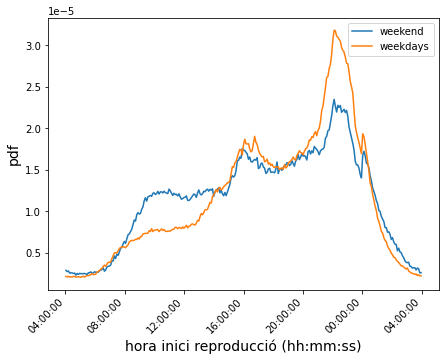

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(7,5)) 

bins=int((max(df['min_data'])-min(df['min_data']))/300)  # bins of 5 minutes (300s)

weekend=df[df['weekend']=='weekend']['min_data'].values
weekdays=df[df['weekend']=='weekdays']['min_data'].values

bins1=int((max(weekend)-min(weekend))/300)
bins2=int((max(weekdays)-min(weekdays))/300)


numpy_matrix = np.array(weekend)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins1,density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center

# we need to do this step to undo the 4 hour time shift for visualisation (adding 4h, i.e. 14400 seconds)
bin_centres_shift=[]    
for i in range(len(bin_centres)):
    bin_centres_shift.append(bin_centres[i]+14400)


numpy_matrix2 = np.array(weekdays)  #list to array
counts2,bin_edges2 = np.histogram(numpy_matrix2,bins2,density=True)   #frequences and bins
bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center
pdf2=counts2/sum(counts2)

# we need to do this step to undo the 4 hour time shift for visualisation (adding 4h, i.e. 14400 seconds)
bin_centres_shift2=[]   
for i in range(len(bin_centres2)):
    bin_centres_shift2.append(bin_centres2[i]+14400)
    
    
ax1.plot(bin_centres_shift, counts, '-', label='weekend')    #plot pdf
ax1.plot(bin_centres_shift2, counts2, '-', label='weekdays')    #plot pdf
ax1.set_xlabel('hora inici reproducció (hh:mm:ss)',fontsize=14)
ax1.set_ylabel('pdf',fontsize=14)
#ax1.set_yscale('log',basey=10)
#ax1.set_xscale('log',basex=10)
#ax1.set_ylim(0.000000001,10)
ax1.legend()

major_ticks = np.arange(14400, 100801, 14400)
ax1.set_xticks(major_ticks)

locs, labels=plt.xticks()
new_xticks=[]
for i in locs:
    ty_res = time.gmtime(i)
    res = time.strftime("%H:%M:%S",ty_res)
    new_xticks.append(res)
    
plt.xticks(locs,new_xticks, rotation=45, horizontalalignment='right')


plt.show()

### 1.1.2- Season

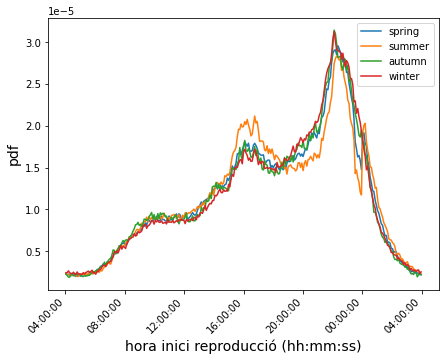

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(7,5)) 

bins=int((max(df['min_data'])-min(df['min_data']))/300) #bins of 5 minutes

spring=df[df['season']=='spring']['min_data'].values
summer=df[df['season']=='summer']['min_data'].values
autumn=df[df['season']=='autumn']['min_data'].values
winter=df[df['season']=='winter']['min_data'].values

bins1=int((max(spring)-min(spring))/300)
bins2=int((max(summer)-min(summer))/300)
bins3=int((max(autumn)-min(autumn))/300)
bins4=int((max(winter)-min(winter))/300)

numpy_matrix = np.array(spring)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins1,density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center

bin_centres_shift=[]   
for i in range(len(bin_centres)):
    bin_centres_shift.append(bin_centres[i]+14400)


numpy_matrix2 = np.array(summer)  #list to array
counts2,bin_edges2 = np.histogram(numpy_matrix2,bins2,density=True)   #frequences and bins
bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center

bin_centres_shift2=[]    
for i in range(len(bin_centres2)):
    bin_centres_shift2.append(bin_centres2[i]+14400)


numpy_matrix3 = np.array(autumn)  #list to array
counts3,bin_edges3 = np.histogram(numpy_matrix3,bins3,density=True)   #frequences and bins
bin_centres3 = (bin_edges3[:-1] + bin_edges3[1:])/2.   #bins center

bin_centres_shift3=[]    
for i in range(len(bin_centres3)):
    bin_centres_shift3.append(bin_centres3[i]+14400)


numpy_matrix4 = np.array(winter)  #list to array
counts4,bin_edges4 = np.histogram(numpy_matrix4,bins4,density=True)   #frequences and bins
bin_centres4 = (bin_edges4[:-1] + bin_edges4[1:])/2.   #bins center

bin_centres_shift4=[]    
for i in range(len(bin_centres4)):
    bin_centres_shift4.append(bin_centres4[i]+14400)


ax1.plot(bin_centres_shift, counts, '-', label='spring')    #plot pdf
ax1.plot(bin_centres_shift2, counts2, '-', label='summer')    #plot pdf
ax1.plot(bin_centres_shift3, counts3, '-', label='autumn')    #plot pdf
ax1.plot(bin_centres_shift4, counts4,'-', label='winter')    #plot pdf
ax1.set_xlabel('hora inici reproducció (hh:mm:ss)',fontsize=14)
ax1.set_ylabel('pdf',fontsize=14)
#ax1.set_yscale('log',basey=10)
#ax1.set_xscale('log',basex=10)
#ax1.set_ylim(0.000000001,10)
ax1.legend()

major_ticks = np.arange(14400, 100801, 14400)
ax1.set_xticks(major_ticks)

locs, labels=plt.xticks()
new_xticks=[]
for i in locs:
    ty_res = time.gmtime(i)
    res = time.strftime("%H:%M:%S",ty_res)
    new_xticks.append(res)
    
plt.xticks(locs,new_xticks, rotation=45, horizontalalignment='right')


plt.show()

## 1.2- Consumption duration

Normalised (density=1) pdf of the initial time of consumption and Decumulative Distribution Function

    - Bins of 1 minute (60s). 
  
     
    

### 1.2.1- Mean values and std

In [10]:
durada_consum=df['durada_consum'].tolist()   # consumption duration to list

mean = sum(durada_consum)/len(durada_consum)  # mean value and standard deviation
variance = sum([((x - mean) ** 2) for x in durada_consum]) / len(durada_consum)
stddev = variance ** 0.5     

ty_res = time.gmtime(mean)  # from total seconds to HH:MM:SS format
res = time.strftime("%H:%M:%S",ty_res)
ty_res2 = time.gmtime(stddev)
res2 = time.strftime("%H:%M:%S",ty_res2)

print('Total')
print('<d>=', mean, 's', '', '=>', '', res)
print('sigma=', stddev, 's', '', '=>', '', res2)

print('')
print('----------------------------------------------------')
print('')


##################################################################3

# WEEKEND

weekend=df[df['weekend']=='weekend']['durada_consum'].values
weekdays=df[df['weekend']=='weekdays']['durada_consum'].values

mean = sum(weekend)/len(weekend)   # mean value and standard deviation
variance = sum([((x - mean) ** 2) for x in weekend]) / len(weekend)
stddev = variance ** 0.5 

ty_res = time.gmtime(mean)  # from total seconds to HH:MM:SS format
res = time.strftime("%H:%M:%S",ty_res)
ty_res2 = time.gmtime(stddev)
res2 = time.strftime("%H:%M:%S",ty_res2)

mean2 = sum(weekdays)/len(weekdays)
variance2 = sum([((x2 - mean2) ** 2) for x2 in weekdays]) / len(weekdays)
stddev2 = variance2 ** 0.5

ty_res3 = time.gmtime(mean2) 
res3 = time.strftime("%H:%M:%S",ty_res3)
ty_res4 = time.gmtime(stddev2)
res4 = time.strftime("%H:%M:%S",ty_res4)

print('Weekdays:')
print('<d>=', mean2, '', '=>', '', res3)
print('sigma=', stddev2, '', '=>', '', res4)

print('')

print('Weekend:')
print('<d>=', mean, '', '=>', '', res)
print('sigma=', stddev, '', '=>', '', res2)

print('')
print('----------------------------------------------------')
print('')



#######################################################################################3

# SEASON

estiu=df[df['season']=='summer']['durada_consum'].values
tardor=df[df['season']=='autumn']['durada_consum'].values
hivern=df[df['season']=='winter']['durada_consum'].values
primavera=df[df['season']=='spring']['durada_consum'].values

mean = sum(estiu)/len(estiu)
variance = sum([((x - mean) ** 2) for x in estiu]) / len(estiu)
stddev = variance ** 0.5 
ty_res = time.gmtime(mean)  
res = time.strftime("%H:%M:%S",ty_res)
ty_res2 = time.gmtime(stddev)
res2 = time.strftime("%H:%M:%S",ty_res2)


mean2 = sum(tardor)/len(tardor)
variance2 = sum([((x2 - mean2) ** 2) for x2 in tardor]) / len(tardor)
stddev2 = variance2 ** 0.5
ty_res3 = time.gmtime(mean2)  
res3 = time.strftime("%H:%M:%S",ty_res3)
ty_res4 = time.gmtime(stddev2)
res4 = time.strftime("%H:%M:%S",ty_res4)


mean3 = sum(hivern)/len(hivern)
variance3 = sum([((x3 - mean3) ** 2) for x3 in hivern]) / len(hivern)
stddev3 = variance3 ** 0.5
ty_res5 = time.gmtime(mean3)  
res5 = time.strftime("%H:%M:%S",ty_res5)
ty_res6 = time.gmtime(stddev3)
res6 = time.strftime("%H:%M:%S",ty_res6)


mean4 = sum(primavera)/len(primavera)
variance4 = sum([((x4 - mean4) ** 2) for x4 in primavera]) / len(primavera)
stddev4 = variance4 ** 0.5
ty_res7 = time.gmtime(mean4)  
res7 = time.strftime("%H:%M:%S",ty_res7)
ty_res8 = time.gmtime(stddev4)
res8 = time.strftime("%H:%M:%S",ty_res8)

print('Summer:')
print('<d>=', mean, '', '=>', '', res)
print('sigma=', stddev, '', '=>', '', res2)

print('')
print('Autumn:')

print('<d>=', mean2, '', '=>', '', res3)
print('sigma=', stddev2, '', '=>', '', res4)

print('')
print('Winter:')

print('<d>=', mean3, '', '=>', '', res5)
print('sigma=', stddev3, '', '=>', '', res6)

print('')
print('Spring:')

print('<d>=', mean4, '', '=>', '', res7)
print('sigma=', stddev4, '', '=>', '', res8)


Total
<d>= 1288.9360753883802 s  =>  00:21:28
sigma= 2980.405043606321 s  =>  00:49:40

----------------------------------------------------

Weekdays:
<d>= 1265.9860842359312  =>  00:21:05
sigma= 2875.3522158689475  =>  00:47:55

Weekend:
<d>= 1358.3257344857777  =>  00:22:38
sigma= 3276.6391937489443  =>  00:54:36

----------------------------------------------------

Summer:
<d>= 1492.939505358647  =>  00:24:52
sigma= 3226.6005997511493  =>  00:53:46

Autumn:
<d>= 1523.1814177033825  =>  00:25:23
sigma= 3736.315484035654  =>  01:02:16

Winter:
<d>= 1161.9111884235012  =>  00:19:21
sigma= 2882.5284899146613  =>  00:48:02

Spring:
<d>= 1168.233320679453  =>  00:19:28
sigma= 2463.8691241382894  =>  00:41:03


<ipython-input-13-b28c2421397d>:18: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-13-b28c2421397d>:23: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-13-b28c2421397d>:24: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)
<ipython-input-13-b28c2421397d>:25: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axins2.set_xlim(-1000,30000)


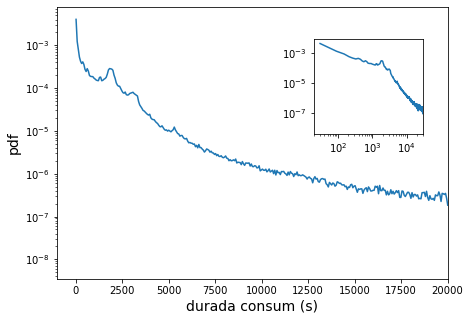

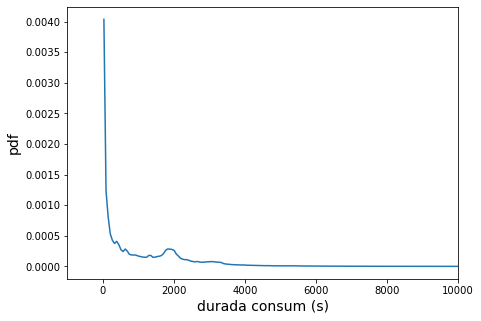

<ipython-input-13-b28c2421397d>:75: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-13-b28c2421397d>:76: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


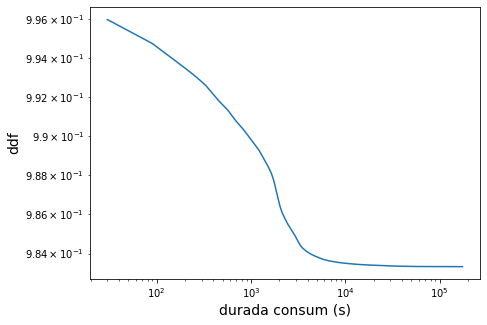

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#### SEMI-LOG WITH INSET LOG-LOG

fig, ax1 = plt.subplots(figsize=(7,5)) 

bins=int((max(df['durada_consum'])-min(df['durada_consum']))/60.)   # bins of 1 minute.
durada_consum=df['durada_consum'].tolist()
numpy_matrix = np.array(durada_consum)  #list to array
counts_consum,bin_edges = np.histogram(numpy_matrix,bins,density=True)   #frequences and bins
bin_centres_consum = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center



ax1.plot(bin_centres_consum, counts_consum, '-', label='data')    #plot pdf
ax1.set_xlabel('durada consum (s)',fontsize=14)
ax1.set_ylabel('pdf',fontsize=14)
ax1.set_yscale('log',basey=10)
#ax1.set_xscale('log',basex=10)
ax1.set_xlim(-1000,20000)
axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,1-0.45,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(bin_centres_consum, counts_consum, '-')
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
axins2.set_xlim(-1000,30000)
plt.show()



#########################################################################



#### LINEAR SCALE

fig, ax1 = plt.subplots(figsize=(7,5)) 

bins=int((max(df['durada_consum'])-min(df['durada_consum']))/60.)
durada_consum=df['durada_consum'].tolist()
numpy_matrix = np.array(durada_consum)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins,density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center

pdf=counts/sum(counts)

ax1.plot(bin_centres, counts, '-', label='data')    #plot pdf
ax1.set_xlabel('durada consum (s)',fontsize=14)
ax1.set_ylabel('pdf',fontsize=14)
#ax1.set_yscale('log',basey=10)
#ax1.set_xscale('log',basex=10)
ax1.set_xlim(-1000,10000)
plt.show()




#########################################################################

#### DECUMULATIVE LOG-LOG

fig, ax1 = plt.subplots(figsize=(7,5)) 

bins=int((max(df['durada_consum'])-min(df['durada_consum']))/60.)
durada_consum=df['durada_consum'].tolist()
numpy_matrix = np.array(durada_consum)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins,density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center

cdf = np.cumsum(counts)
dcdf=1-cdf

ax1.plot(bin_centres, dcdf, '-', label='data')    #plot pdf
ax1.set_xlabel('durada consum (s)',fontsize=14)
ax1.set_ylabel('ddf',fontsize=14)
ax1.set_yscale('log',basey=10)
ax1.set_xscale('log',basex=10)
#ax1.set_xlim(-100,4000)
plt.show()

### 1.2.2- Weekend

<ipython-input-14-28931a8a7872>:34: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-14-28931a8a7872>:42: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-14-28931a8a7872>:43: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)
<ipython-input-14-28931a8a7872>:44: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axins2.set_xlim(-1000,30000)


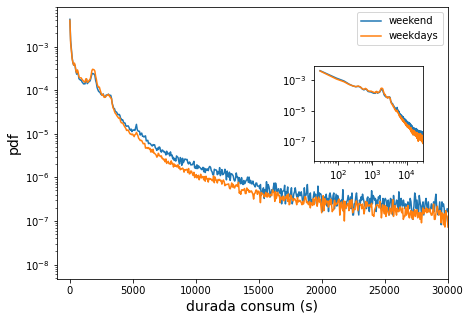

<ipython-input-14-28931a8a7872>:83: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-14-28931a8a7872>:84: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


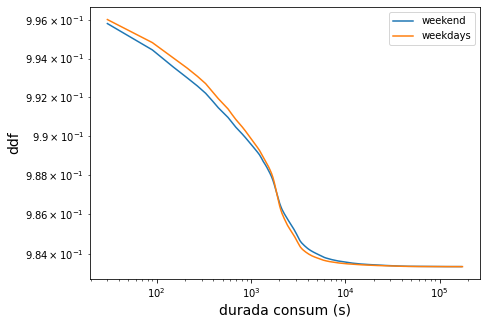

In [14]:
import matplotlib.pyplot as plt
import numpy as np



fig, ax1 = plt.subplots(figsize=(7,5)) 

bins=int((max(df['durada_consum'])-min(df['durada_consum']))/60)

weekend=df[df['weekend']=='weekend']['durada_consum'].values
weekdays=df[df['weekend']=='weekdays']['durada_consum'].values

bins1=int((max(weekend)-min(weekend))/60)
bins2=int((max(weekdays)-min(weekdays))/60)

numpy_matrix = np.array(weekend)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins1,density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
pdf=counts/sum(counts)
cdf = np.cumsum(pdf)
dcdf=1-cdf

numpy_matrix2 = np.array(weekdays)  #list to array
counts2,bin_edges2 = np.histogram(numpy_matrix2,bins2,density=True)   #frequences and bins
bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center
pdf2=counts2/sum(counts2)
cdf2 = np.cumsum(pdf2)
dcdf2=1-cdf2

ax1.plot(bin_centres, counts, '-', label='weekend')    #plot pdf
ax1.plot(bin_centres2, counts2, '-', label='weekdays')    #plot pdf
ax1.set_xlabel('durada consum (s)',fontsize=14)
ax1.set_ylabel('pdf',fontsize=14)
ax1.set_yscale('log',basey=10)
#ax1.set_xscale('log',basex=10)
ax1.set_xlim(-1000,30000)
#ax1.set_ylim(0.00000001,2)
ax1.legend()
axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,1-0.55,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(bin_centres, counts, '-')
axins2.plot(bin_centres2, counts2, '-')
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
axins2.set_xlim(-1000,30000)




plt.show()


############################################################################3


fig, ax1 = plt.subplots(figsize=(7,5)) 

bins=int((max(df['durada_consum'])-min(df['durada_consum']))/60)

weekend=df[df['weekend']=='weekend']['durada_consum'].values
weekdays=df[df['weekend']=='weekdays']['durada_consum'].values

bins1=int((max(weekend)-min(weekend))/60)
bins2=int((max(weekdays)-min(weekdays))/60)

numpy_matrix = np.array(weekend)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins1,density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
pdf=counts/sum(counts)
cdf = np.cumsum(counts)
dcdf=1-cdf

numpy_matrix2 = np.array(weekdays)  #list to array
counts2,bin_edges2 = np.histogram(numpy_matrix2,bins2,density=True)   #frequences and bins
bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center
pdf2=counts2/sum(counts2)
cdf2 = np.cumsum(counts2)
dcdf2=1-cdf2

ax1.plot(bin_centres, dcdf, '-', label='weekend')    #plot pdf
ax1.plot(bin_centres2, dcdf2, '-', label='weekdays')    #plot pdf
ax1.set_xlabel('durada consum (s)',fontsize=14)
ax1.set_ylabel('ddf',fontsize=14)
ax1.set_yscale('log',basey=10)
ax1.set_xscale('log',basex=10)
#ax1.set_xlim(-500,90000)
#ax1.set_ylim(0.00000001,2)
ax1.legend()




plt.show()

### 1.2.3- Season

<ipython-input-15-096987b5ffc1>:54: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-15-096987b5ffc1>:64: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-15-096987b5ffc1>:65: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)
<ipython-input-15-096987b5ffc1>:66: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axins2.set_xlim(-500,20000)


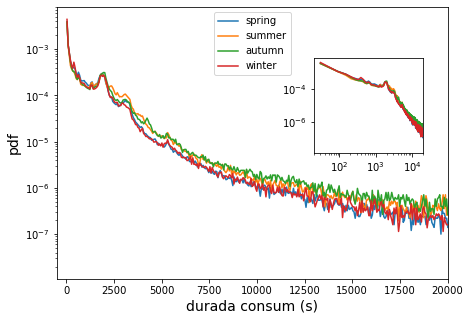

<ipython-input-15-096987b5ffc1>:130: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-15-096987b5ffc1>:131: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


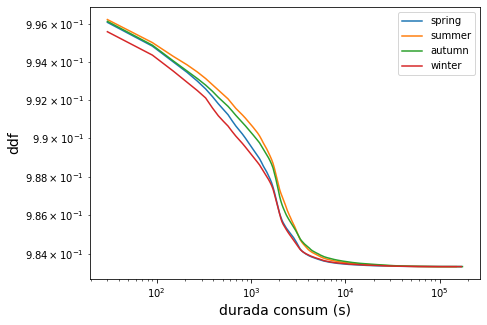

In [15]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax1 = plt.subplots(figsize=(7,5)) 

bins=int((max(df['durada_consum'])-min(df['durada_consum']))/60)

spring=df[df['season']=='spring']['durada_consum'].values
summer=df[df['season']=='summer']['durada_consum'].values
autumn=df[df['season']=='autumn']['durada_consum'].values
winter=df[df['season']=='winter']['durada_consum'].values

bins1=int((max(spring)-min(spring))/60)
bins2=int((max(summer)-min(summer))/60)
bins3=int((max(autumn)-min(autumn))/60)
bins4=int((max(winter)-min(winter))/60)


numpy_matrix = np.array(spring)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins1,density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
pdf=counts/sum(counts)
cdf = np.cumsum(counts)
dcdf=1-cdf

numpy_matrix2 = np.array(summer)  #list to array
counts2,bin_edges2 = np.histogram(numpy_matrix2,bins2,density=True)   #frequences and bins
bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center
pdf2=counts2/sum(counts2)
cdf2 = np.cumsum(counts2)
dcdf2=1-cdf2

numpy_matrix3 = np.array(autumn)  #list to array
counts3,bin_edges3 = np.histogram(numpy_matrix3,bins3,density=True)   #frequences and bins
bin_centres3 = (bin_edges3[:-1] + bin_edges3[1:])/2.   #bins center
pdf3=counts3/sum(counts3)
cdf3 = np.cumsum(counts3)
dcdf3=1-cdf3

numpy_matrix4 = np.array(winter)  #list to array
counts4,bin_edges4 = np.histogram(numpy_matrix4,bins4,density=True)   #frequences and bins
bin_centres4 = (bin_edges4[:-1] + bin_edges4[1:])/2.   #bins center
pdf4=counts4/sum(counts4)
cdf4 = np.cumsum(counts4)
dcdf4=1-cdf4

ax1.plot(bin_centres, counts, '-', label='spring')    #plot pdf
ax1.plot(bin_centres2, counts2, '-', label='summer')    #plot pdf
ax1.plot(bin_centres3, counts3, '-', label='autumn')    #plot pdf
ax1.plot(bin_centres4, counts4,'-', label='winter')    #plot pdf
ax1.set_xlabel('durada consum (s)',fontsize=14)
ax1.set_ylabel('pdf',fontsize=14)
ax1.set_yscale('log',basey=10)
#ax1.set_xscale('log',basex=10)
ax1.set_xlim(-500,20000)
#ax1.set_ylim(0.00000001,2)

axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,1-0.52,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(bin_centres, counts, '-')
axins2.plot(bin_centres2, counts2, '-')
axins2.plot(bin_centres3, counts3, '-')
axins2.plot(bin_centres4, counts4, '-')
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
axins2.set_xlim(-500,20000)

ax1.legend(loc='upper center')




plt.show()








fig, ax1 = plt.subplots(figsize=(7,5)) 

bins=int((max(df['durada_consum'])-min(df['durada_consum']))/60)

spring=df[df['season']=='spring']['durada_consum'].values
summer=df[df['season']=='summer']['durada_consum'].values
autumn=df[df['season']=='autumn']['durada_consum'].values
winter=df[df['season']=='winter']['durada_consum'].values

bins1=int((max(spring)-min(spring))/60)
bins2=int((max(summer)-min(summer))/60)
bins3=int((max(autumn)-min(autumn))/60)
bins4=int((max(winter)-min(winter))/60)

numpy_matrix = np.array(spring)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins1,density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
pdf=counts/sum(counts)
cdf = np.cumsum(counts)
dcdf=1-cdf

numpy_matrix2 = np.array(summer)  #list to array
counts2,bin_edges2 = np.histogram(numpy_matrix2,bins2,density=True)   #frequences and bins
bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center
pdf2=counts2/sum(counts2)
cdf2 = np.cumsum(counts2)
dcdf2=1-cdf2

numpy_matrix3 = np.array(autumn)  #list to array
counts3,bin_edges3 = np.histogram(numpy_matrix3,bins3,density=True)   #frequences and bins
bin_centres3 = (bin_edges3[:-1] + bin_edges3[1:])/2.   #bins center
pdf3=counts3/sum(counts3)
cdf3 = np.cumsum(counts3)
dcdf3=1-cdf3

numpy_matrix4 = np.array(winter)  #list to array
counts4,bin_edges4 = np.histogram(numpy_matrix4,bins4,density=True)   #frequences and bins
bin_centres4 = (bin_edges4[:-1] + bin_edges4[1:])/2.   #bins center
pdf4=counts4/sum(counts4)
cdf4 = np.cumsum(counts4)
dcdf4=1-cdf4

ax1.plot(bin_centres, dcdf, '-', label='spring')    #plot pdf
ax1.plot(bin_centres2, dcdf2, '-', label='summer')    #plot pdf
ax1.plot(bin_centres3, dcdf3, '-', label='autumn')    #plot pdf
ax1.plot(bin_centres4, dcdf4,'-', label='winter')    #plot pdf
ax1.set_xlabel('durada consum (s)',fontsize=14)
ax1.set_ylabel('ddf',fontsize=14)
ax1.set_yscale('log',basey=10)
ax1.set_xscale('log',basex=10)
#ax1.set_xlim(-500,170000)
#ax1.set_ylim(0.00000001,2)
ax1.legend()




plt.show()

## 1.3- Videoclip duration

Normalised (density=1) pdf of the initial time of consumption and Decumulative Distribution Function

    - Bins of 1 minute (60s). 

### 1.3.1- Mean values and std

In [18]:
durada_consum=df['durada'].tolist()   # consumption duration to list

mean = sum(durada_consum)/len(durada_consum)  # mean value and standard deviation
variance = sum([((x - mean) ** 2) for x in durada_consum]) / len(durada_consum)
stddev = variance ** 0.5     

ty_res = time.gmtime(mean)  # from total seconds to HH:MM:SS format
res = time.strftime("%H:%M:%S",ty_res)
ty_res2 = time.gmtime(stddev)
res2 = time.strftime("%H:%M:%S",ty_res2)

print('Total')
print('<d>=', mean, 's', '', '=>', '', res)
print('sigma=', stddev, 's', '', '=>', '', res2)

print('')
print('----------------------------------------------------')
print('')


##################################################################3

# WEEKEND

weekend=df[df['weekend']=='weekend']['durada'].values
weekdays=df[df['weekend']=='weekdays']['durada'].values

mean = sum(weekend)/len(weekend)   # mean value and standard deviation
variance = sum([((x - mean) ** 2) for x in weekend]) / len(weekend)
stddev = variance ** 0.5 

ty_res = time.gmtime(mean)  # from total seconds to HH:MM:SS format
res = time.strftime("%H:%M:%S",ty_res)
ty_res2 = time.gmtime(stddev)
res2 = time.strftime("%H:%M:%S",ty_res2)

mean2 = sum(weekdays)/len(weekdays)
variance2 = sum([((x2 - mean2) ** 2) for x2 in weekdays]) / len(weekdays)
stddev2 = variance2 ** 0.5

ty_res3 = time.gmtime(mean2) 
res3 = time.strftime("%H:%M:%S",ty_res3)
ty_res4 = time.gmtime(stddev2)
res4 = time.strftime("%H:%M:%S",ty_res4)

print('Weekdays:')
print('<d>=', mean2, '', '=>', '', res3)
print('sigma=', stddev2, '', '=>', '', res4)

print('')

print('Weekend:')
print('<d>=', mean, '', '=>', '', res)
print('sigma=', stddev, '', '=>', '', res2)

print('')
print('----------------------------------------------------')
print('')



#######################################################################################3

# SEASON

estiu=df[df['season']=='summer']['durada'].values
tardor=df[df['season']=='autumn']['durada'].values
hivern=df[df['season']=='winter']['durada'].values
primavera=df[df['season']=='spring']['durada'].values

mean = sum(estiu)/len(estiu)
variance = sum([((x - mean) ** 2) for x in estiu]) / len(estiu)
stddev = variance ** 0.5 
ty_res = time.gmtime(mean)  
res = time.strftime("%H:%M:%S",ty_res)
ty_res2 = time.gmtime(stddev)
res2 = time.strftime("%H:%M:%S",ty_res2)


mean2 = sum(tardor)/len(tardor)
variance2 = sum([((x2 - mean2) ** 2) for x2 in tardor]) / len(tardor)
stddev2 = variance2 ** 0.5
ty_res3 = time.gmtime(mean2)  
res3 = time.strftime("%H:%M:%S",ty_res3)
ty_res4 = time.gmtime(stddev2)
res4 = time.strftime("%H:%M:%S",ty_res4)


mean3 = sum(hivern)/len(hivern)
variance3 = sum([((x3 - mean3) ** 2) for x3 in hivern]) / len(hivern)
stddev3 = variance3 ** 0.5
ty_res5 = time.gmtime(mean3)  
res5 = time.strftime("%H:%M:%S",ty_res5)
ty_res6 = time.gmtime(stddev3)
res6 = time.strftime("%H:%M:%S",ty_res6)


mean4 = sum(primavera)/len(primavera)
variance4 = sum([((x4 - mean4) ** 2) for x4 in primavera]) / len(primavera)
stddev4 = variance4 ** 0.5
ty_res7 = time.gmtime(mean4)  
res7 = time.strftime("%H:%M:%S",ty_res7)
ty_res8 = time.gmtime(stddev4)
res8 = time.strftime("%H:%M:%S",ty_res8)

print('Summer:')
print('<d>=', mean, '', '=>', '', res)
print('sigma=', stddev, '', '=>', '', res2)

print('')
print('Autumn:')

print('<d>=', mean2, '', '=>', '', res3)
print('sigma=', stddev2, '', '=>', '', res4)

print('')
print('Winter:')

print('<d>=', mean3, '', '=>', '', res5)
print('sigma=', stddev3, '', '=>', '', res6)

print('')
print('Spring:')

print('<d>=', mean4, '', '=>', '', res7)
print('sigma=', stddev4, '', '=>', '', res8)


Total
<d>= 2422.884191680986 s  =>  00:40:22
sigma= 2480.320525335294 s  =>  00:41:20

----------------------------------------------------

Weekdays:
<d>= 2327.386734792186  =>  00:38:47
sigma= 2229.512138003387  =>  00:37:09

Weekend:
<d>= 2711.6222541126594  =>  00:45:11
sigma= 3100.4227787706914  =>  00:51:40

----------------------------------------------------

Summer:
<d>= 2394.044645341022  =>  00:39:54
sigma= 2155.0357862460173  =>  00:35:55

Autumn:
<d>= 2317.260295430609  =>  00:38:37
sigma= 2421.727990983128  =>  00:40:21

Winter:
<d>= 2431.6694262512706  =>  00:40:31
sigma= 2638.468825745114  =>  00:43:58

Spring:
<d>= 2480.672510349066  =>  00:41:20
sigma= 2549.0000283477507  =>  00:42:29


<ipython-input-19-bb14f950a151>:21: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-19-bb14f950a151>:22: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)
<ipython-input-19-bb14f950a151>:23: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axins2.set_xlim(-500,15000)


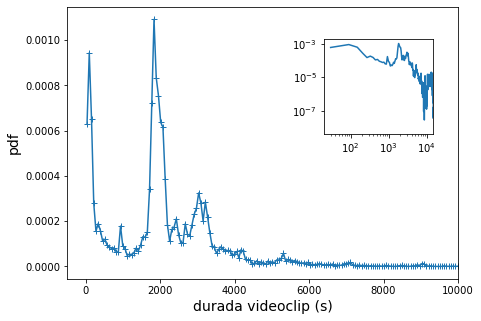

<ipython-input-19-bb14f950a151>:48: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-19-bb14f950a151>:49: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


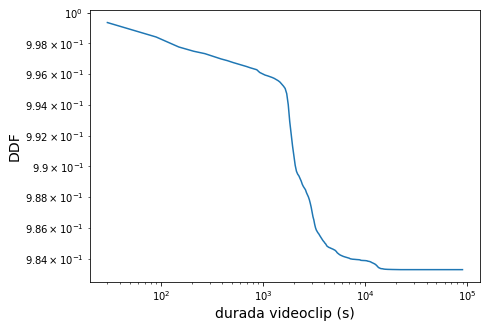

In [19]:
###LINEAR SCALE WITH INSET LOG-LOG

fig, ax1 = plt.subplots(figsize=(7,5)) 

durada=df['durada'].tolist()
bins=int((max(df['durada'])-min(df['durada']))/60.)
numpy_matrix = np.array(durada)  #list to array
counts_durada,bin_edges = np.histogram(numpy_matrix,bins,density=True)   #frequences and bins
bin_centres_durada = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center


ax1.plot(bin_centres_durada, counts_durada, '-+', label='data')    #plot pdf
ax1.set_xlabel('durada videoclip (s)',fontsize=14)
ax1.set_ylabel('pdf',fontsize=14)
#ax1.set_yscale('log',basey=10)
#ax1.set_xscale('log',basex=10)
ax1.set_xlim(-500,10000)

axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,1-0.45,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(bin_centres_durada, counts_durada, '-')
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
axins2.set_xlim(-500,15000)


plt.show()




##########################################################

### DECUMULATIVE LOG-LOG

fig, ax1 = plt.subplots(figsize=(7,5)) 

durada=df['durada'].tolist()
numpy_matrix = np.array(durada)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins,density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center

cdf = np.cumsum(counts)
dcdf=1-cdf

ax1.plot(bin_centres, dcdf, '-', label='data')    #plot pdf
ax1.set_xlabel('durada videoclip (s)',fontsize=14)
ax1.set_ylabel('DDF',fontsize=14)
ax1.set_yscale('log',basey=10)
ax1.set_xscale('log',basex=10)
#ax1.set_ylim(0.000000001,10)
plt.show()


### 1.3.2- Weekend

<ipython-input-20-4aa05a7e7096>:39: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-20-4aa05a7e7096>:40: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)
<ipython-input-20-4aa05a7e7096>:41: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axins2.set_xlim(-500,15000)


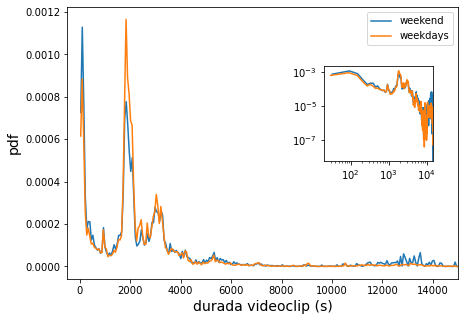

<ipython-input-20-4aa05a7e7096>:78: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-20-4aa05a7e7096>:79: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)
<ipython-input-20-4aa05a7e7096>:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_xlim(-500,30000)


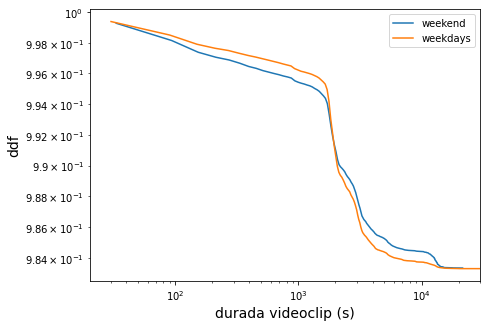

In [20]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(7,5)) 


weekend=df[df['weekend']=='weekend']['durada'].values
weekdays=df[df['weekend']=='weekdays']['durada'].values

bins1=int((max(weekend)-min(weekend))/60)
bins2=int((max(weekdays)-min(weekdays))/60)

numpy_matrix = np.array(weekend)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins1,density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
pdf=counts/sum(counts)
cdf = np.cumsum(pdf)
dcdf=1-cdf

numpy_matrix2 = np.array(weekdays)  #list to array
counts2,bin_edges2 = np.histogram(numpy_matrix2,bins2,density=True)   #frequences and bins
bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center
pdf2=counts2/sum(counts2)
cdf2 = np.cumsum(pdf2)
dcdf2=1-cdf2

ax1.plot(bin_centres, counts, '-', label='weekend')    #plot pdf
ax1.plot(bin_centres2, counts2, '-', label='weekdays')    #plot pdf
ax1.set_xlabel('durada videoclip (s)',fontsize=14)
ax1.set_ylabel('pdf',fontsize=14)
#ax1.set_yscale('log',basey=10)
#ax1.set_xscale('log',basex=10)
ax1.set_xlim(-500,15000)
ax1.legend()

axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,1-0.55,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(bin_centres, counts, '-')
axins2.plot(bin_centres2, counts2, '-')
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
axins2.set_xlim(-500,15000)


plt.show()



#############################################################################################


fig, ax1 = plt.subplots(figsize=(7,5)) 


weekend=df[df['weekend']=='weekend']['durada'].values
weekdays=df[df['weekend']=='weekdays']['durada'].values

bins1=int((max(weekend)-min(weekend))/60)
bins2=int((max(weekdays)-min(weekdays))/60)

numpy_matrix = np.array(weekend)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins1,density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
pdf=counts/sum(counts)
cdf = np.cumsum(counts)
dcdf=1-cdf

numpy_matrix2 = np.array(weekdays)  #list to array
counts2,bin_edges2 = np.histogram(numpy_matrix2,bins2,density=True)   #frequences and bins
bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center
pdf2=counts2/sum(counts2)
cdf2 = np.cumsum(counts2)
dcdf2=1-cdf2

ax1.plot(bin_centres, dcdf, '-', label='weekend')    #plot pdf
ax1.plot(bin_centres2, dcdf2, '-', label='weekdays')    #plot pdf
ax1.set_xlabel('durada videoclip (s)',fontsize=14)
ax1.set_ylabel('ddf',fontsize=14)
ax1.set_yscale('log',basey=10)
ax1.set_xscale('log',basex=10)
ax1.set_xlim(-500,30000)
ax1.legend()




plt.show()


### 1.3.3- Season

<ipython-input-21-1ca6efdf759c>:63: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-21-1ca6efdf759c>:64: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)
<ipython-input-21-1ca6efdf759c>:65: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axins2.set_xlim(-500,15000)


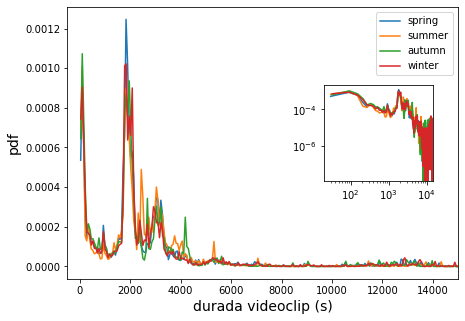

<ipython-input-21-1ca6efdf759c>:124: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-21-1ca6efdf759c>:125: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)
<ipython-input-21-1ca6efdf759c>:127: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_xlim(-500,80000)


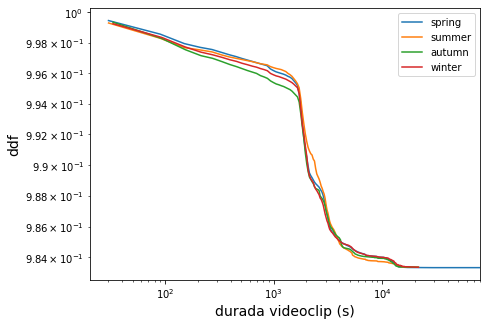

In [21]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax1 = plt.subplots(figsize=(7,5)) 



spring=df[df['season']=='spring']['durada'].values
summer=df[df['season']=='summer']['durada'].values
autumn=df[df['season']=='autumn']['durada'].values
winter=df[df['season']=='winter']['durada'].values

bins1=int((max(spring)-min(spring))/60)
bins2=int((max(summer)-min(summer))/60)
bins3=int((max(autumn)-min(autumn))/60)
bins4=int((max(winter)-min(winter))/60)

numpy_matrix = np.array(spring)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins1,density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
pdf=counts/sum(counts)
cdf = np.cumsum(pdf)
dcdf=1-cdf

numpy_matrix2 = np.array(summer)  #list to array
counts2,bin_edges2 = np.histogram(numpy_matrix2,bins2,density=True)   #frequences and bins
bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center
pdf2=counts2/sum(counts2)
cdf2 = np.cumsum(pdf2)
dcdf2=1-cdf2

numpy_matrix3 = np.array(autumn)  #list to array
counts3,bin_edges3 = np.histogram(numpy_matrix3,bins3,density=True)   #frequences and bins
bin_centres3 = (bin_edges3[:-1] + bin_edges3[1:])/2.   #bins center
pdf3=counts3/sum(counts3)
cdf3 = np.cumsum(pdf3)
dcdf3=1-cdf3

numpy_matrix4 = np.array(winter)  #list to array
counts4,bin_edges4 = np.histogram(numpy_matrix4,bins4,density=True)   #frequences and bins
bin_centres4 = (bin_edges4[:-1] + bin_edges4[1:])/2.   #bins center
pdf4=counts4/sum(counts4)
cdf4 = np.cumsum(pdf4)
dcdf4=1-cdf4

ax1.plot(bin_centres, counts, '-', label='spring')    #plot pdf
ax1.plot(bin_centres2, counts2, '-', label='summer')    #plot pdf
ax1.plot(bin_centres3, counts3, '-', label='autumn')    #plot pdf
ax1.plot(bin_centres4, counts4,'-', label='winter')    #plot pdf
ax1.set_xlabel('durada videoclip (s)',fontsize=14)
ax1.set_ylabel('pdf',fontsize=14)
#ax1.set_yscale('log',basey=10)
#ax1.set_xscale('log',basex=10)
ax1.set_xlim(-500,15000)
ax1.legend()

axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,1-0.62,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(bin_centres, counts, '-')
axins2.plot(bin_centres2, counts2, '-')
axins2.plot(bin_centres3, counts3, '-')
axins2.plot(bin_centres4, counts4, '-')
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
axins2.set_xlim(-500,15000)


plt.show()



#########################################################################



fig, ax1 = plt.subplots(figsize=(7,5)) 



spring=df[df['season']=='spring']['durada'].values
summer=df[df['season']=='summer']['durada'].values
autumn=df[df['season']=='autumn']['durada'].values
winter=df[df['season']=='winter']['durada'].values

bins1=int((max(spring)-min(spring))/60)
bins2=int((max(summer)-min(summer))/60)
bins3=int((max(autumn)-min(autumn))/60)
bins4=int((max(winter)-min(winter))/60)

numpy_matrix = np.array(spring)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins1,density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
pdf=counts/sum(counts)
cdf = np.cumsum(counts)
dcdf=1-cdf

numpy_matrix2 = np.array(summer)  #list to array
counts2,bin_edges2 = np.histogram(numpy_matrix2,bins2,density=True)   #frequences and bins
bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center
pdf2=counts2/sum(counts2)
cdf2 = np.cumsum(counts2)
dcdf2=1-cdf2

numpy_matrix3 = np.array(autumn)  #list to array
counts3,bin_edges3 = np.histogram(numpy_matrix3,bins3,density=True)   #frequences and bins
bin_centres3 = (bin_edges3[:-1] + bin_edges3[1:])/2.   #bins center
pdf3=counts3/sum(counts3)
cdf3 = np.cumsum(counts3)
dcdf3=1-cdf3

numpy_matrix4 = np.array(winter)  #list to array
counts4,bin_edges4 = np.histogram(numpy_matrix4,bins4,density=True)   #frequences and bins
bin_centres4 = (bin_edges4[:-1] + bin_edges4[1:])/2.   #bins center
pdf4=counts4/sum(counts4)
cdf4 = np.cumsum(counts4)
dcdf4=1-cdf4

ax1.plot(bin_centres, dcdf, '-', label='spring')    #plot pdf
ax1.plot(bin_centres2, dcdf2, '-', label='summer')    #plot pdf
ax1.plot(bin_centres3, dcdf3, '-', label='autumn')    #plot pdf
ax1.plot(bin_centres4, dcdf4,'-', label='winter')    #plot pdf
ax1.set_xlabel('durada videoclip (s)',fontsize=14)
ax1.set_ylabel('ddf',fontsize=14)
ax1.set_yscale('log',basey=10)
ax1.set_xscale('log',basex=10)
#ax1.set_ylim(0.000000001,10)
ax1.set_xlim(-500,80000)
ax1.legend()




plt.show()

## 1.4- Logged users

Users with more than 1.000 interaccions and users with only 1 interaction (dispersed).

In [5]:
print('average number of interactions per user is:', (len(df['usuari_id']))/(len(df['usuari_id'].unique())))

average number of interactions per user is: 10.915894985935616


In [55]:
df['usuari_id'].value_counts()

76461ea0c45211e9a05d93580548d25d    6344
d67c03101d1d11eaaad0dd0a42997348    3790
66ac49a0414711e7a2ba2966b3ffede4    3368
82c79b90205511ea8a742978692e52e2    2611
fb154300991f11e7a7f1a7b331426ccd    2545
                                    ... 
1b93ef90b93411eb8f76659b7c132db7       1
58f6be40157311eb9bc56b6c55eef539       1
04fcdc20d99b11ea86821dc1e093be20       1
9fdc2f707fac11e88efe4d0e2a3689df       1
04cd19f04f1511ebbbbf7775c6742a70       1
Name: usuari_id, Length: 223970, dtype: int64

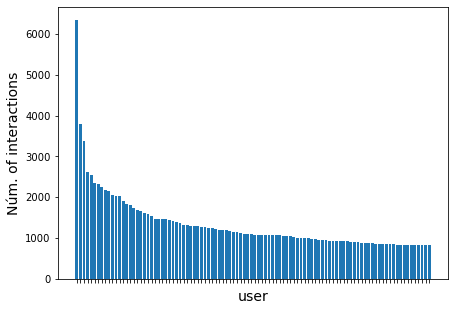

average number of interactions per use: 10.915894985935616
standard deviation: 47.632408596026735


In [8]:
values = df['usuari_id'].value_counts().keys().tolist()  
counts = df['usuari_id'].value_counts().tolist()


fig, ax1 = plt.subplots(figsize=(7,5)) 

ax1.bar(values[:100], counts[:100])    #plot the 100 most frequent users.
ax1.set_xlabel('user', fontsize=14)
ax1.set_ylabel('Núm. of interactions',fontsize=14)
ax1.set(xticklabels=[])

plt.show()

mean = sum(counts)/len(counts)   # mean and std
variance = sum([((x - mean) ** 2) for x in counts]) / len(counts)
stddev = variance ** 0.5

print('average number of interactions per use:', mean)
print('standard deviation:',stddev)

## 1.5- Discrete/categorical dimensions: device, program, day...

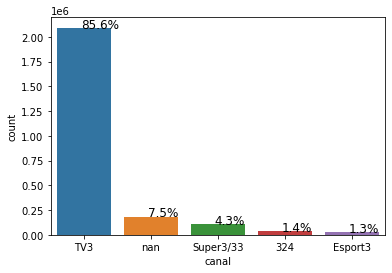

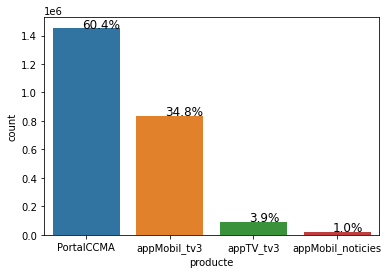

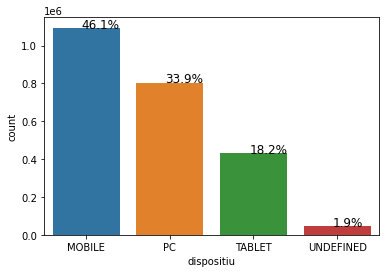

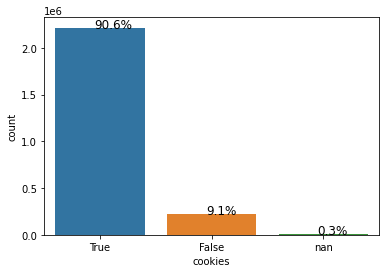

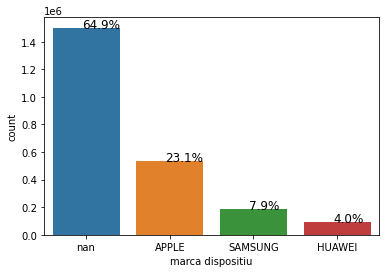

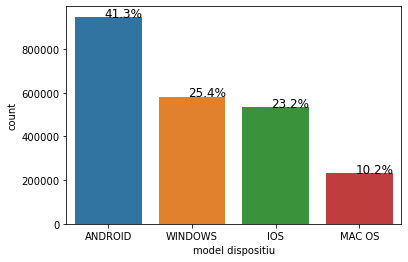

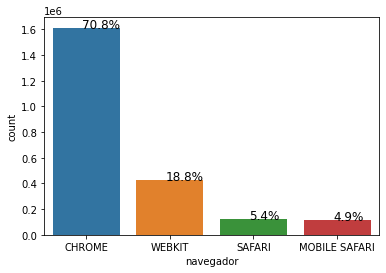

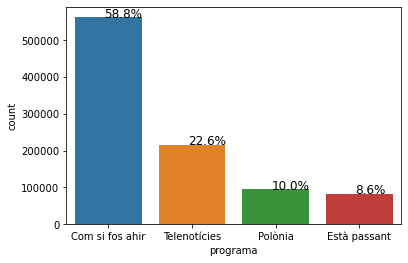

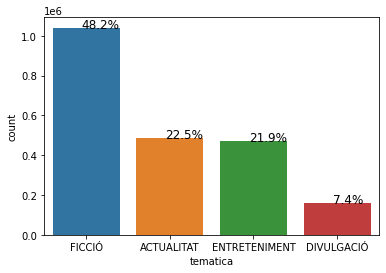

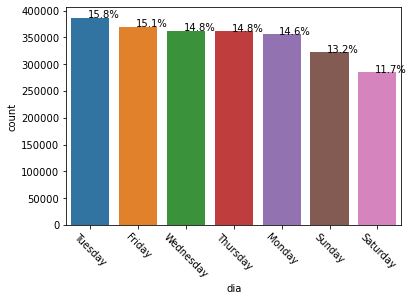

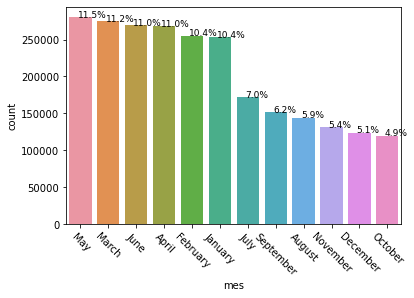

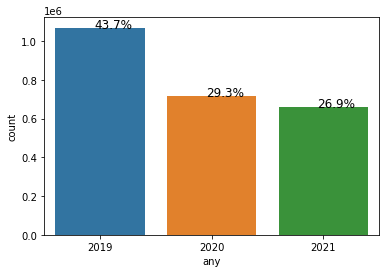

In [39]:
# CHANNEL
ax = sns.countplot(x=df['canal_nom'], data=df['canal_nom'],order = df['canal_nom'].value_counts().index)
plt.xlabel('channel')
plt.ylabel('count')

total = sum(df['canal_nom'].value_counts())

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.1
    ax.annotate(percentage, (x, y), size = 12)
plt.show()


##############################################

# PRODUCT
ax = sns.countplot(x=df['producte_id'], data=df['producte_id'],order = df['producte_id'].value_counts().iloc[:4].index)
plt.xlabel('product')
plt.ylabel('count')

total = sum(df['producte_id'].value_counts().iloc[:4])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)

plt.show()




##############################################

# DEVICE
ax = sns.countplot(x=df['dispositiu_tipus'], data=df['dispositiu_tipus'],order = df['dispositiu_tipus'].value_counts().iloc[:4].index)
plt.xlabel('device')
plt.ylabel('count')

total = sum(df['dispositiu_tipus'].value_counts().iloc[:4])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)


plt.show()




##############################################

# COOKIES
ax = sns.countplot(x=df['dispositiu_accepta_cookies'], data=df['dispositiu_accepta_cookies'],order = df['dispositiu_accepta_cookies'].value_counts().index)
plt.xlabel('cookies')
plt.ylabel('count')

total = sum(df['dispositiu_accepta_cookies'].value_counts())

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)


plt.show()





##############################################

# DEVICE VENDOR
ax = sns.countplot(x=df['dispositiu_vendor'], data=df['dispositiu_vendor'],order = df['dispositiu_vendor'].value_counts().iloc[:4].index)
plt.xlabel('device vendor')
plt.ylabel('count')

total = sum(df['dispositiu_vendor'].value_counts().iloc[:4])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)


plt.show()




##############################################

# DEVICE MODEL
ax = sns.countplot(x=df['dispositiu_model'], data=df['dispositiu_model'],order = df['dispositiu_model'].value_counts().iloc[:4].index)
plt.xlabel('device model')
plt.ylabel('count')

total = sum(df['dispositiu_model'].value_counts().iloc[:4])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)


plt.show()


##############################################

# BROWSER
ax = sns.countplot(x=df['dispositiu_browser_nom'], data=df['dispositiu_browser_nom'],order = df['dispositiu_browser_nom'].value_counts().iloc[:4].index)
plt.xlabel('browser')
plt.ylabel('count')

total = sum(df['dispositiu_browser_nom'].value_counts().iloc[:4])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)


plt.show()



##############################################

# PROGRAM
ax = sns.countplot(x=df['programa_nom'], data=df['programa_nom'],order = df['programa_nom'].value_counts().iloc[:4].index)
plt.xlabel('program')
plt.ylabel('count')

total = sum(df['programa_nom'].value_counts().iloc[:4])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)


plt.show()




##############################################

# THEME
ax = sns.countplot(x=df['tematica'], data=df['tematica'],order = df['tematica'].value_counts().iloc[:4].index)
plt.xlabel('theme')
plt.ylabel('count')

total = sum(df['tematica'].value_counts().iloc[:4])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)


plt.show()



##############################################

# DAY
ax = sns.countplot(x=df['day'], data=df['day'],order = df['day'].value_counts().index)
plt.xlabel('day')
plt.ylabel('count')

total = sum(df['day'].value_counts())

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 10)
    plt.xticks(rotation=315)

plt.show()



##############################################

# MONTH
ax = sns.countplot(x=df['month'], data=df['month'],order = df['month'].value_counts().index)
plt.xlabel('month')
plt.ylabel('count')

total = sum(df['month'].value_counts())

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 9)
    plt.xticks(rotation=315)

plt.show()



##############################################

# YEAR
ax = sns.countplot(x=df['year'], data=df['year'],order = df['year'].value_counts().index)
plt.xlabel('year')
plt.ylabel('count')

total = sum(df['year'].value_counts())

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.1
    ax.annotate(percentage, (x, y), size = 12)


plt.show()